#1. Upload File

In [1]:
# model name = 'res10_300x300_ssd_iter_140000.caffemodel'
# prototxt_name = 'deploy.prototxt.txt'
# file_name = obama1
from google.colab import files
files.upload()

Saving deploy.prototxt.txt to deploy.prototxt.txt
Saving obama_01.mp4 to obama_01.mp4
Saving res10_300x300_ssd_iter_140000.caffemodel to res10_300x300_ssd_iter_140000.caffemodel


In [ ]:
!ls -al

#2. Load File

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import IPython

In [ ]:
model_name = 'res10_300x300_ssd_iter_140000.caffemodel'
prototxt_name = 'deploy.prototxt.txt'
file_name = 'obama_01.mp4'

In [ ]:
min_confidence = 0.3
frame_width = 300
frame_height = 300

#3. DNN Model

In [ ]:
model = cv2.dnn.readNetFromCaffe(prototxt_name, model_name)

In [ ]:
def detectAndDisplay(frame):
  IPython.display.clear_output(wait=True)
  blob = cv2.dnn.blobFromImage(cv2.resize(frame, (300, 300)), 1.0, (300,300), (104.0, 177.0, 123.0))
  model.setInput(blob)
  detections = model.forward()
  for i in range(0, detections.shape[2]):
    # extract confidence
    confidence = detections[0,0,i,2]
    if confidence > min_confidence:
      height, width = frame.shape[:2]
      box = detections[0,0,i,3:7] * np.array([width, height, width, height])
      (start_x, start_y, end_x, end_y) = box.astype('int')
      print(confidence, start_x, start_y, end_x, end_y)
      text = '{:.2f}%'.format(confidence*100)
      y = start_y - 10 if start_y > 20 else start_y+10
      cv2.rectangle(frame, (start_x, start_y), (end_x, end_y), (0,255,0), 2)
      cv2.putText(frame, text, (start_x, y), cv2.FONT_HERSHEY_COMPLEX, 0.5, (0,255,0), 1)

  # show the output
  cv2_imshow(frame)

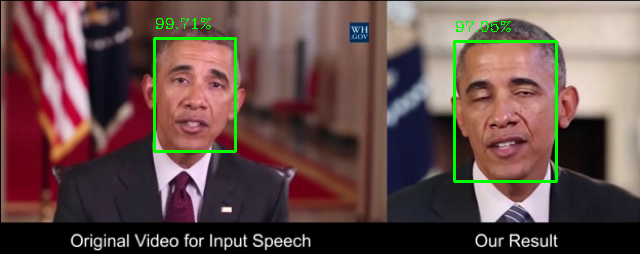

No Frame


In [ ]:
# 2. read the video stream
cap = cv2.VideoCapture(file_name)
if not cap.isOpened:
  print("File Load Error")
  exit(0) 

while True:
  ret, frame = cap.read()
  if frame is None:
    print("No Frame")
    break
  detectAndDisplay(frame)